                                   **LOADING** **NECESSARY** LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

**IMPORTING** **DATA**

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


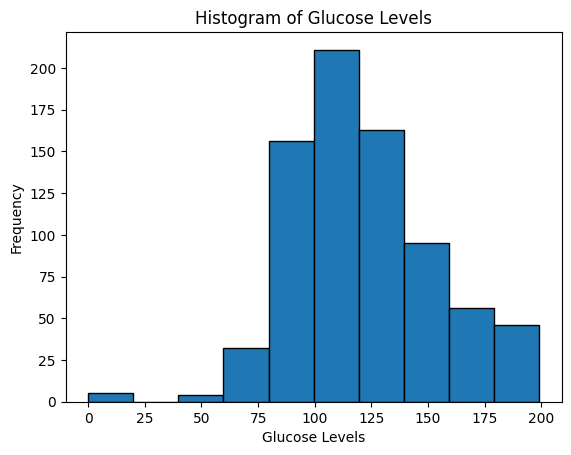

In [4]:
# Plot a histogram for the 'Glucose' variable
plt.hist(data['Glucose'], bins=10, edgecolor='black')
plt.title('Histogram of Glucose Levels')
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.show()


In [7]:
import seaborn as sns
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


NameError: name 'df' is not defined

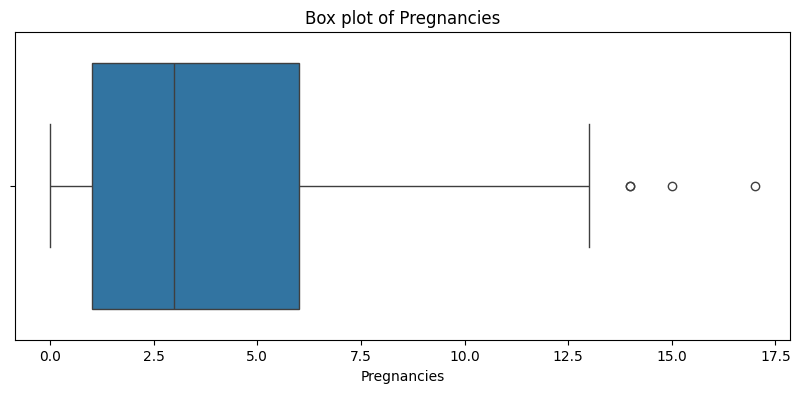

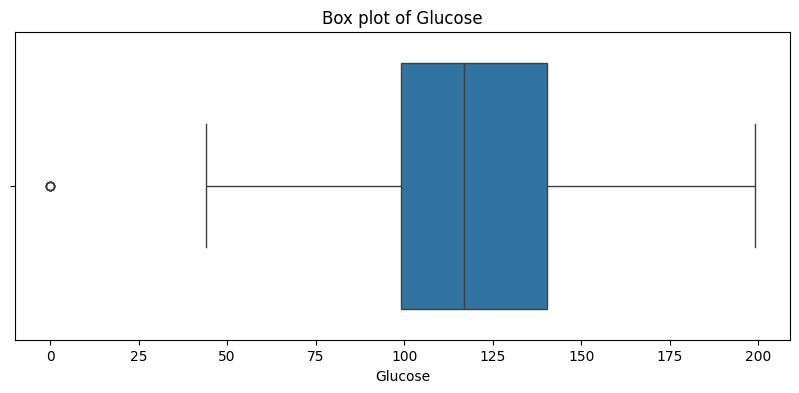

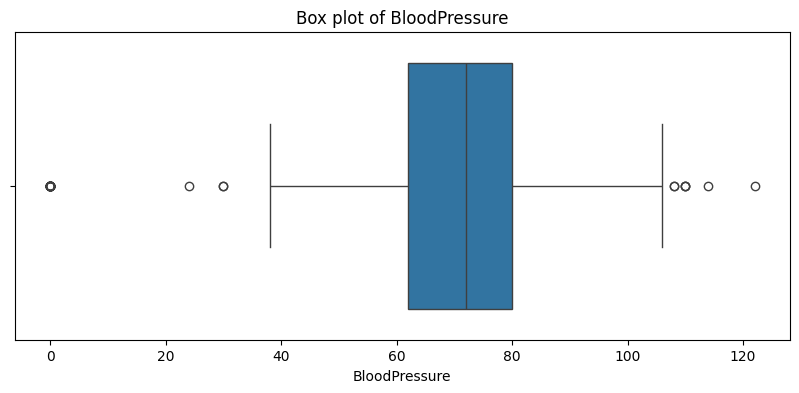

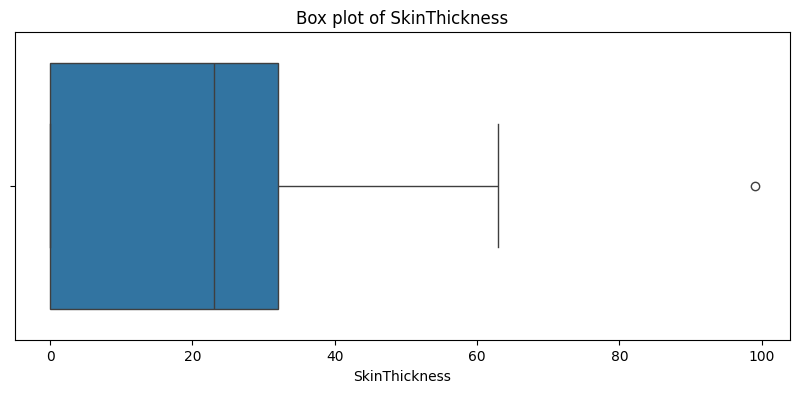

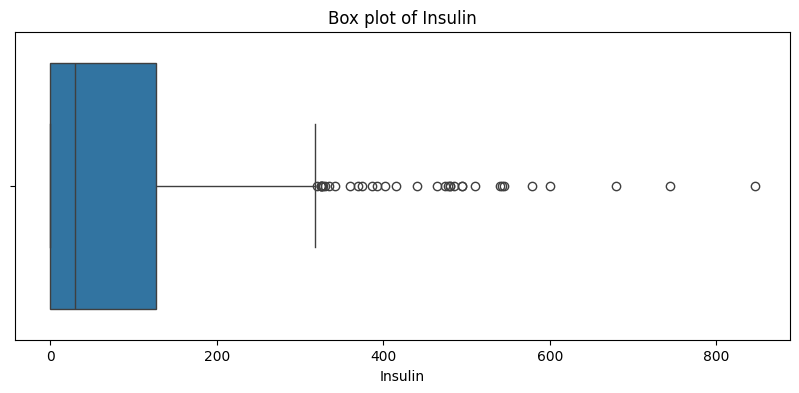

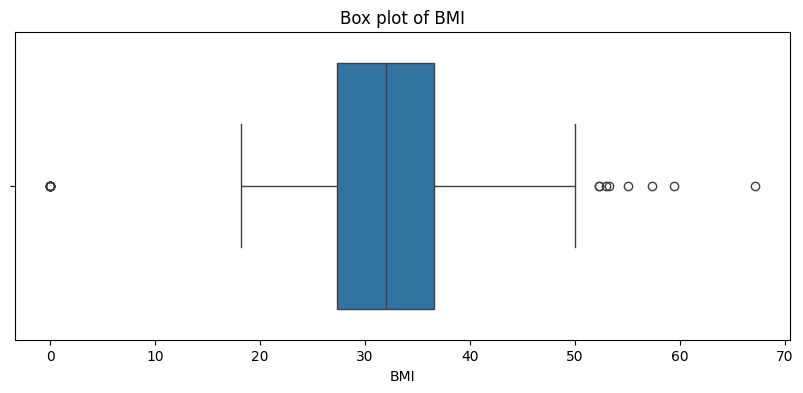

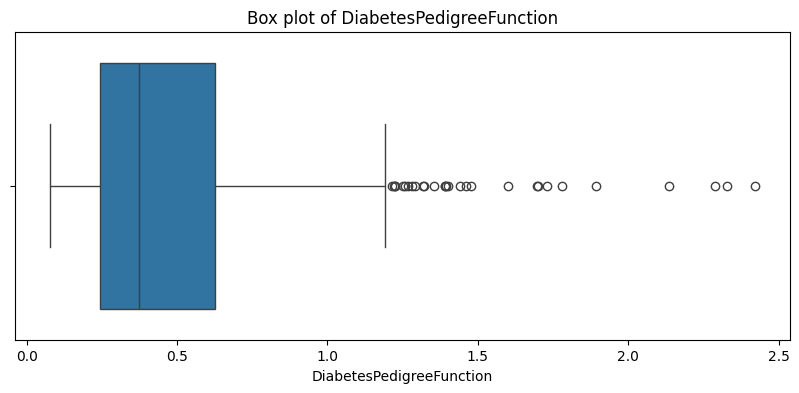

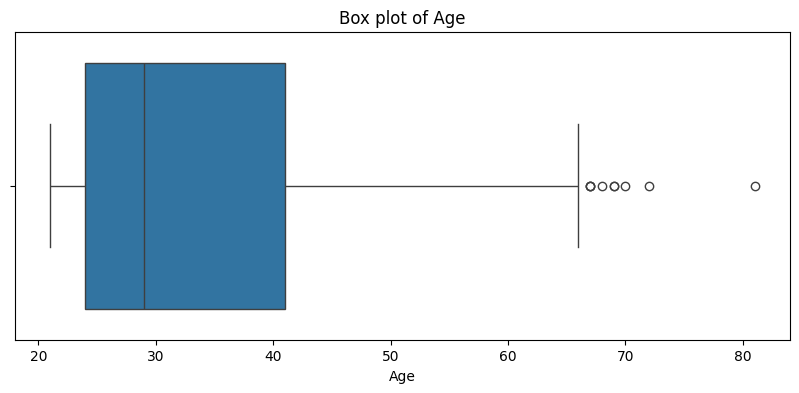

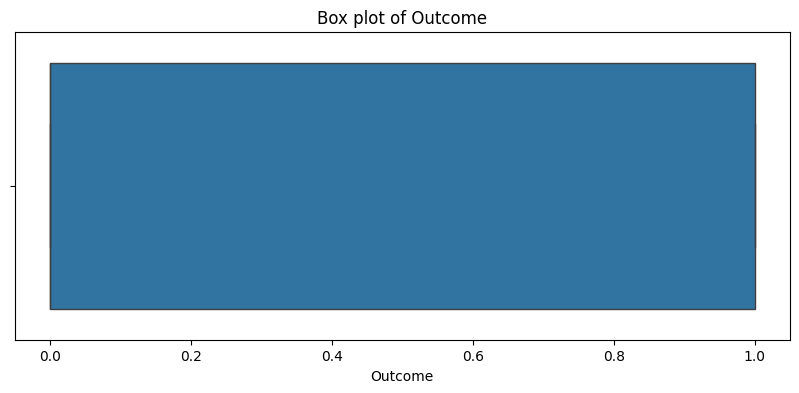

In [8]:
for column in data.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title('Box plot of ' + column)
    plt.show()

In [9]:
#HANDLING OUTLIERS
# For each column, remove rows with values more than 1.5*IQR away from the median
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR)))]



In [10]:
# Save the cleaned dataset
data.to_csv('diabetes_cleaned.csv', index=False)


In [6]:
df = pd.read_csv('/content/diabetes_cleaned.csv')

In [90]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


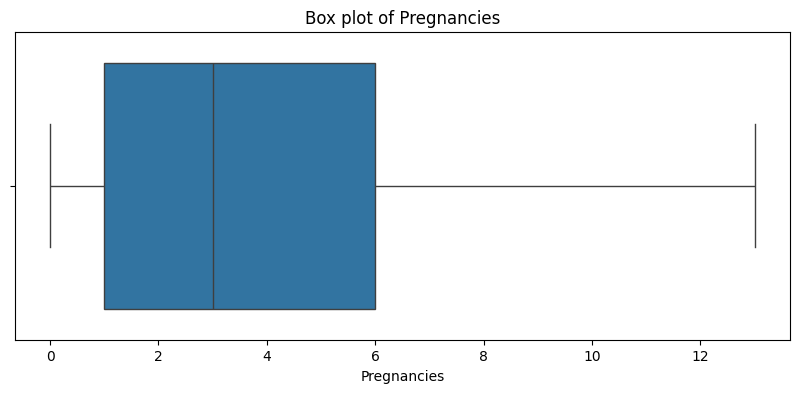

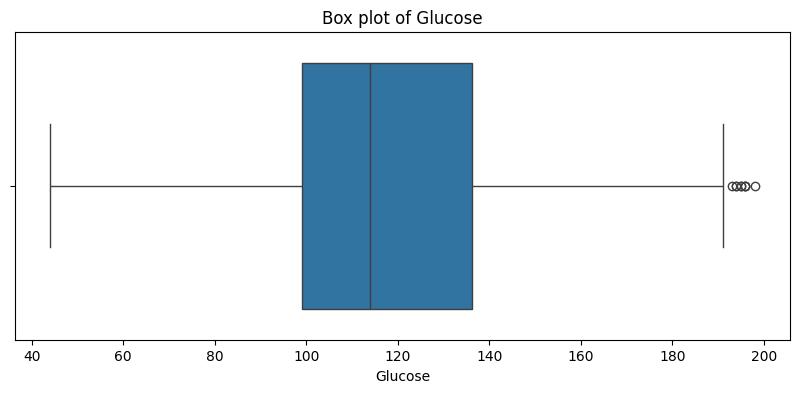

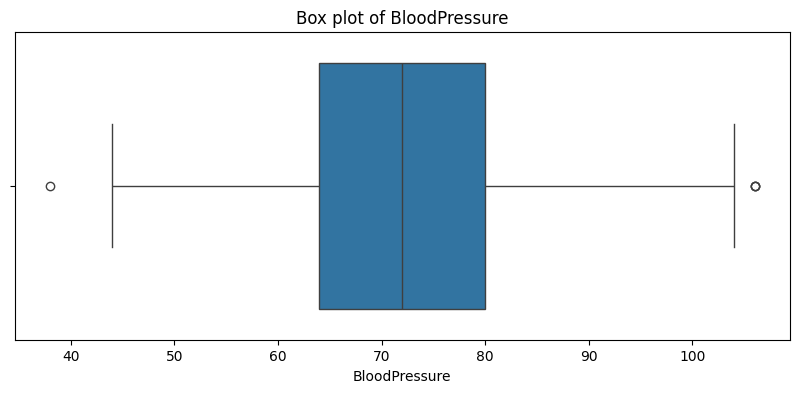

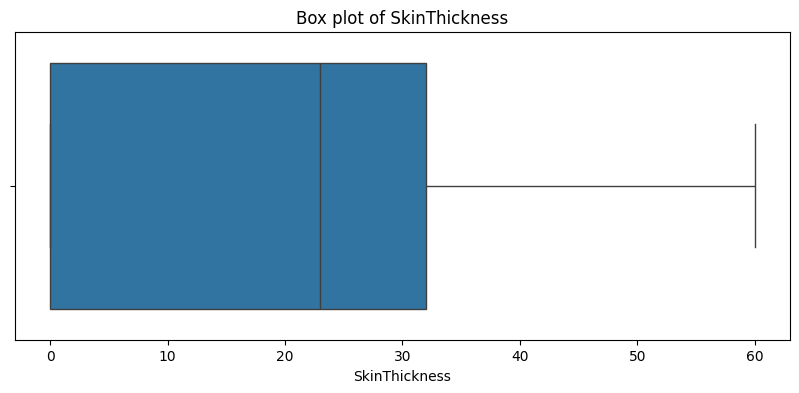

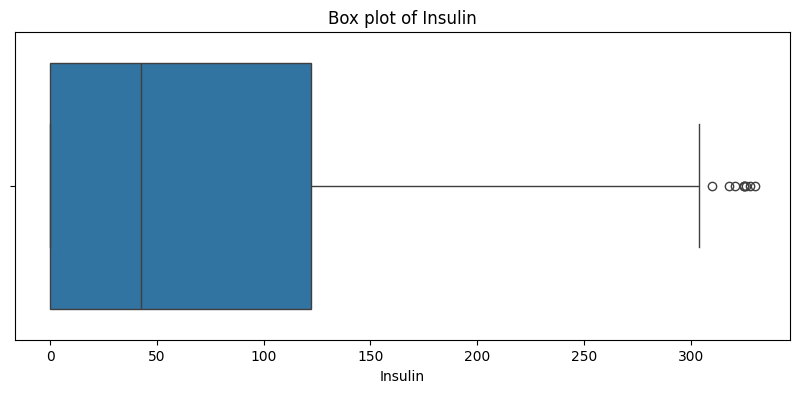

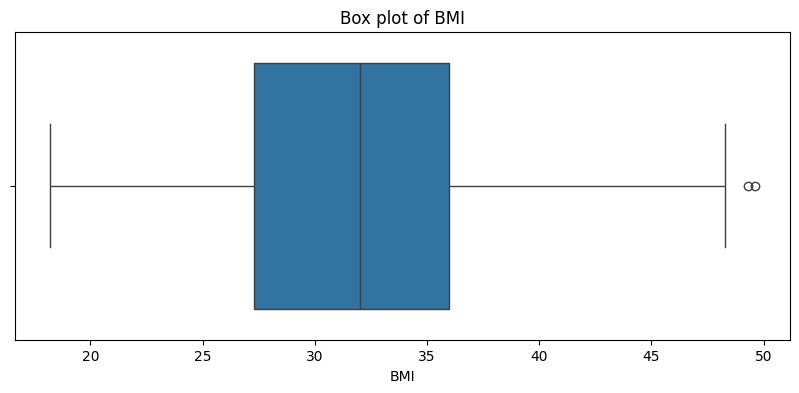

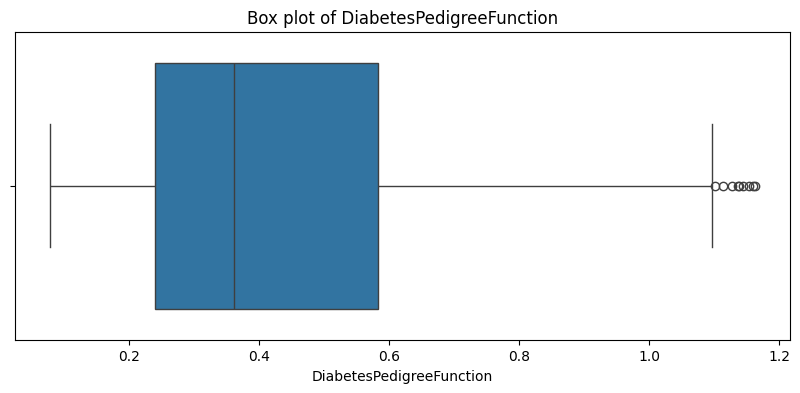

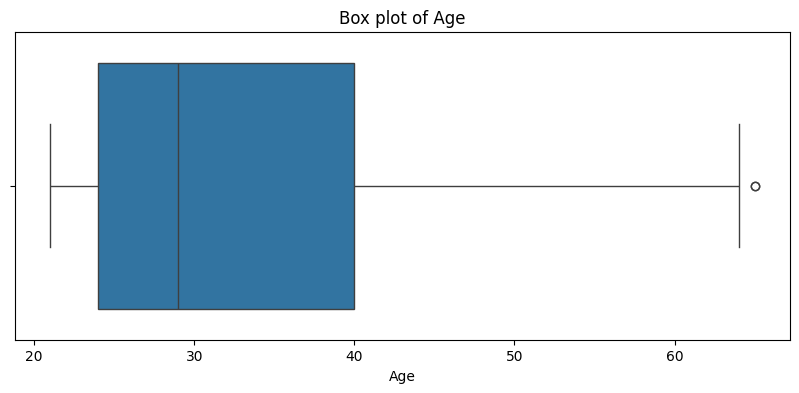

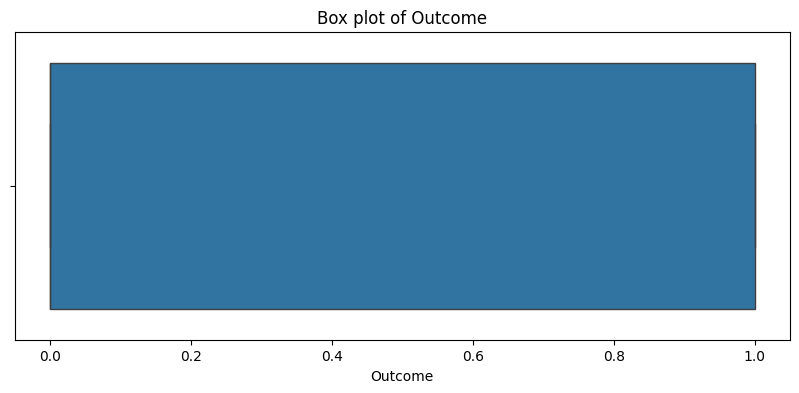

In [11]:
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title('Box plot of ' + column)
    plt.show()

In [12]:
# Count the number of individuals with and without diabetes
diabetes_counts = df['Outcome'].value_counts()



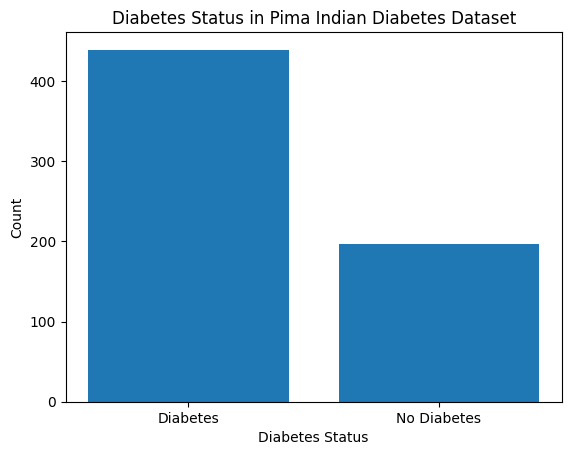

In [13]:
# Create a bar chart
plt.bar(['Diabetes', 'No Diabetes'], diabetes_counts)
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Diabetes Status in Pima Indian Diabetes Dataset')
plt.show()

In [14]:
X = df[['Pregnancies', 	'Glucose', 	'BloodPressure', 	'SkinThickness', 	'Insulin', 	'BMI', 	'DiabetesPedigreeFunction', 	'Age']]
y = df[['Outcome']]

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import column_or_1d

In [16]:
y = column_or_1d(y, warn=True)

<ipython-input-16-5dd5a24b6538>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import HuberRegressor

In [19]:
huber = HuberRegressor()

# Fit the model
huber.fit(X_train, y_train)

# Make predictions
predictions = huber.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
print(predictions)

[ 0.81544893  0.2872101   0.21370572  0.52539539  0.38286509  0.1120198
  0.21720621 -0.11345141 -0.08395373  0.54479569  0.37855652  0.26680177
  0.47077185  0.28797306 -0.0728741   0.44668144  0.38096467  1.00469353
  0.00115735  0.52856861  0.36753402  0.77551429  0.11013592  0.35640037
  0.4967916   0.36540132 -0.01099652  0.35042362  0.04329893  0.36217294
  0.67081741  0.0441467   0.3881304   0.20063846  0.11322787  0.28003234
 -0.17810792  0.8518013   0.84104991  0.23182075  0.19452634  0.05315884
  0.51677968  0.02855851  0.13436561  0.12243447  0.72175081  0.08967879
  0.24269534  0.29902368 -0.11501501  0.03937012  0.19302985  0.02410641
  0.04185899  0.83628275  0.23395546  0.38618261  0.34148028 -0.08004939
  0.71003597  0.09569113  0.15696557  0.16341005  0.16231195  0.1023051
  0.37397478  0.71453297  0.29333972  0.95759025  0.47506995  0.25604334
  0.10304602  0.87722266  0.25987268 -0.03617968  0.76815573  0.17621157
  0.29733586  0.78568313 -0.21466501  0.43347837 -0.1

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train,y_train)

LogisticRegression()

In [24]:
predictionLR = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test,predictionLR)

In [26]:
print('Accuracy:', accuracy)

Accuracy: 0.7265625


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_classifier = DecisionTreeClassifier()

In [29]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
predictionDT = dt_classifier.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, predictionDT)
print("Accuracy:", accuracy)

Accuracy: 0.7578125


In [32]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [34]:
classifier = SVC(kernel='linear')

In [35]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (classifier.intercept_[0]) / w[1]


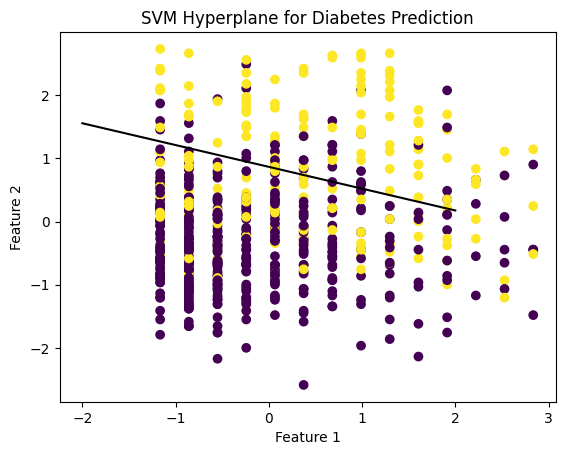

In [37]:
plt.figure()
plt.plot(xx, yy, 'k-')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Hyperplane for Diabetes Prediction')
plt.show()

In [38]:
from sklearn import svm

In [39]:
clf = svm.SVC(kernel='linear')  # Choose the appropriate kernel
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
y_pred = clf.predict(X_test)

In [41]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7265625


In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)

In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
predictionKNN = knn.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, predictionKNN)
print("Accuracy:", accuracy)

Accuracy: 0.734375


In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
nb = GaussianNB()

In [49]:
nb.fit(X_train, y_train)

GaussianNB()

In [50]:
predictionNB = nb.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, predictionNB)
print("Accuracy:", accuracy)

Accuracy: 0.6953125


In [52]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [53]:
selector = SelectKBest(f_classif, k='all')
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

In [54]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [56]:
rf_predictionRFF = rf_classifier.predict(X_test)
gb_predictionGB = gb_classifier.predict(X_test)


In [57]:
rf_accuracy = accuracy_score(y_test, rf_predictionRFF)
gb_accuracy = accuracy_score(y_test, gb_predictionGB)


In [58]:
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)

Random Forest Accuracy: 0.71875
Gradient Boosting Accuracy: 0.7578125


In [59]:
#ANN
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

In [60]:
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))  # Input layer
model.add(Dense(50, activation='relu'))  # Hidden layer
model.add(Dense(10, activation='relu'))  # Hidden layer
model.add(Dense(5, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
# Compile the neural network
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [ ]:
# Train the neural network
model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6875 - loss: 0.6428 - val_accuracy: 0.7188 - val_loss: 0.5966
Epoch 2/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6885 - loss: 0.5833 - val_accuracy: 0.7188 - val_loss: 0.5588
Epoch 3/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - loss: 0.5481 - val_accuracy: 0.7188 - val_loss: 0.5508
Epoch 4/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6796 - loss: 0.4828 - val_accuracy: 0.7188 - val_loss: 0.5542
Epoch 5/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6751 - loss: 0.4908 - val_accuracy: 0.7188 - val_loss: 0.5531
Epoch 6/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7455 - loss: 0.4259 - val_accuracy: 0.7500 - val_loss: 0.5506
Epoch 7/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7644 - loss: 0.4859 - val_accuracy: 0.7500 - val_loss: 0.5596
Epoch 8/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7725 - loss: 0.4620 - val_accuracy: 0.

In [ ]:
# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6917 - loss: 10.5776 
Test loss: 8.41965389251709
Test accuracy: 0.75


In [62]:
#CatBoost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.6 MB/s eta 0:00:00


In [63]:
from catboost import CatBoostClassifier

In [64]:
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', eval_metric='Accuracy')


In [65]:
# Fit the model on the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)

0:	learn: 0.7893701	test: 0.7421875	best: 0.7421875 (0)	total: 53.7ms	remaining: 53.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7890625
bestIteration = 44

Shrink model to first 45 iterations.


In [66]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [67]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the CatBoost model: {accuracy}")

Accuracy of the CatBoost model: 0.7890625


In [68]:
#CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [69]:
# Add padding to the input data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

In [70]:
# Reshape the data for CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

In [71]:
# Build the CNN model
model = Sequential()


In [72]:
# Use padding='same' in Conv2D layer to avoid reducing the spatial dimensions
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(X_train.shape[1], 1, 1)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
# Use smaller pool size in MaxPooling2D layer
model.add(MaxPooling2D((1, 1)))


In [74]:
model.add(Flatten())

In [75]:
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [76]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [77]:
# Fit the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6503 - loss: 0.6369 - val_accuracy: 0.7734 - val_loss: 0.5084
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7742 - loss: 0.4833 - val_accuracy: 0.7500 - val_loss: 0.5063
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8161 - loss: 0.4060 - val_accuracy: 0.7422 - val_loss: 0.5130
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7835 - loss: 0.4236 - val_accuracy: 0.7422 - val_loss: 0.4964
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8126 - loss: 0.3840 - val_accuracy: 0.7422 - val_loss: 0.4992
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7716 - loss: 0.4320 - val_accuracy: 0.7734 - val_loss: 0.4927
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7977 - loss: 0.3986 - val_accuracy: 0.7266 - val_loss: 0.5069
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8172 - loss: 0.3611 - val_accuracy: 0.7266 - val_loss

In [78]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy of the CNN model: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.5909 
Accuracy of the CNN model: 0.7421875


In [79]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from scipy.stats import shapiro
from sklearn.model_selection import cross_val_score, train_test_split

In [80]:
# Feature Importance Analysis
model = RandomForestClassifier()
model.fit(X, y)
feature_importance = model.feature_importances_
print("Feature Importance:")
# Convert the numpy array to a DataFrame
X = pd.DataFrame(X)

# Iterate over the columns of the DataFrame
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importance[i]}")


Feature Importance:
0: 0.08924072106694192
1: 0.26216791174800536
2: 0.09403827215902062
3: 0.07370465602670118
4: 0.06899268310558972
5: 0.14206767683599092
6: 0.12838732187842705
7: 0.14140075717932335


In [81]:
# Comparative Analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {type(model).__name__}: {accuracy}")

Accuracy of RandomForestClassifier: 0.71875
Accuracy of DecisionTreeClassifier: 0.7734375
Accuracy of LogisticRegression: 0.7265625


In [82]:
# Cross-Validation Techniques
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   # Convert the numpy array to a DataFrame
y = pd.DataFrame(y)

# Select the rows of the DataFrame based on the indices
y_train = y.iloc[train_index]
y_test = y.iloc[test_index]

In [83]:
#  X_train and y_train are the training data
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [84]:
# Initialize your model
model = [RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression()]


In [85]:
# Iterate over the folds
# Ensure train_index and test_index are within the range of X_train indices
train_index = [idx for idx in train_index if idx < len(X_train)]
test_index = [idx for idx in test_index if idx < len(X_train)]

# Now, this should not raise a KeyError
X_train_fold, X_test_fold = X_train.loc[train_index], X_train.loc[test_index]


In [86]:
model = Sequential()
# Add layers to your model


In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [88]:
# List of models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('CatBoost', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('CNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

In [89]:
# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "-"*60 + "\n")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        86
           1       0.79      0.54      0.64        41

    accuracy                           0.80       127
   macro avg       0.80      0.73      0.75       127
weighted avg       0.80      0.80      0.79       127

Confusion Matrix:
[[80  6]
 [19 22]]

------------------------------------------------------------

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        86
           1       0.48      0.54      0.51        41

    accuracy                           0.66       127
   macro avg       0.62      0.63      0.62       127
weighted avg       0.67      0.66      0.67       127

Confusion Matrix:
[[62 24]
 [19 22]]

------------------------------------------------------------

Model: CatBoost
Classification Report:
             

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Model: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        86
           1       0.72      0.56      0.63        41

    accuracy                           0.79       127
   macro avg       0.76      0.73      0.74       127
weighted avg       0.78      0.79      0.78       127

Confusion Matrix:
[[77  9]
 [18 23]]

------------------------------------------------------------

